Let's load up our data and do a little cleanup. Also let's parse our dates and get the year out of the date as a separate column. We will want to use the year in some of our plots to indicate the passage of time.

In [1]:
import pandas as pd

DATA = '/kaggle/input/samsung-electronics-historical-stock-prices/samsung_electronics_stocks_data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date']).drop(columns=['Unnamed: 0'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,year
0,2000-01-04 00:00:00+09:00,4325.925736,4405.234375,4080.789945,4405.234375,74195000,2000
1,2000-01-05 00:00:00+09:00,4181.727606,4369.184360,3979.851100,4023.110352,74680000,2000
2,2000-01-06 00:00:00+09:00,4145.679580,4167.309212,4023.111662,4051.951172,54390000,2000
3,2000-01-07 00:00:00+09:00,4008.691972,4088.000626,3864.494419,3994.272217,40305000,2000
4,2000-01-10 00:00:00+09:00,4037.530735,4160.098633,4023.110983,4160.098633,46880000,2000


First let's look at the price/volume correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999900,0.999921,0.999803,-0.322857
High,0.999900,1.000000,0.999892,0.999914,-0.320503
Low,0.999921,0.999892,1.000000,0.999913,-0.324658
Close,0.999803,0.999914,0.999913,1.000000,-0.322858
Volume,-0.322857,-0.320503,-0.324658,-0.322858,1.000000


What do we see?
* None of our prices are perfectly correlated; this means we have no repeated columns of data.
* Our prices and volumes are somewhat negatively correlated; this is not surprising, as successful companies have stock prices that rise over time, and as prices rise they tend to drive daily volumes down.
Let's plot the closing price time series and see what we have.

<Axes: xlabel='Date', ylabel='Close'>

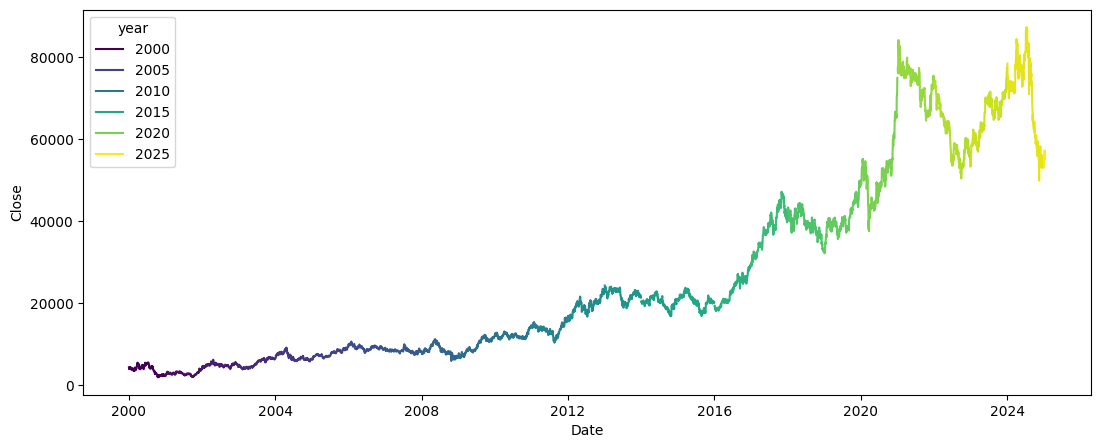

In [3]:
import matplotlib.pyplot as plt
from seaborn import lineplot
from warnings import filterwarnings

FIGSIZE = (13, 5)
PALETTE = 'viridis'

filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=FIGSIZE)
lineplot(palette=PALETTE, data=df, x='Date', y='Close', hue='year')

If instead of plotting the time series of the price we plot the time series of the log of the price we may see more relative movement, as opposed to absolute movement, in the price.

<Axes: xlabel='Date', ylabel='Close'>

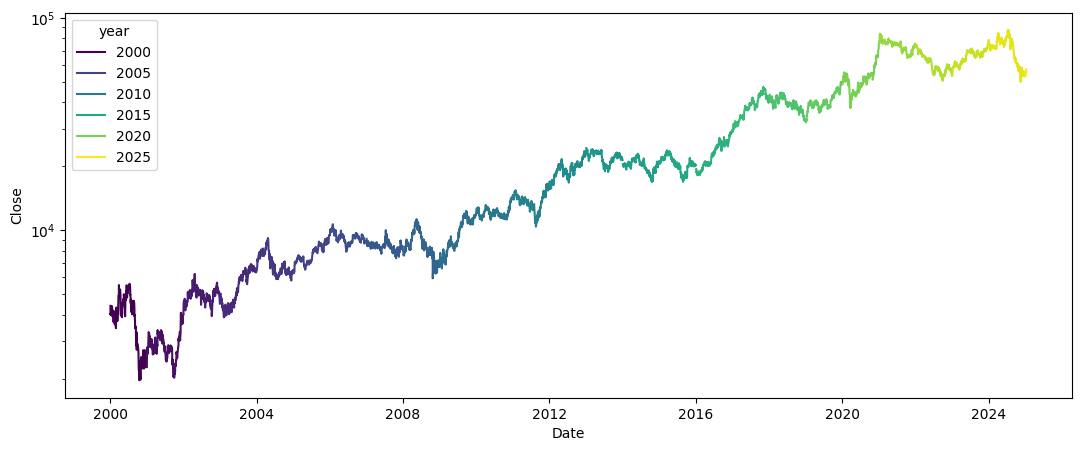

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
lineplot(palette=PALETTE, data=df, x='Date', y='Close', hue='year')

What do we see in these two plots?
* Both plots show a big run-up in the price over the period of interest, but with periodic reversals.
* The two plots portray the reversals starting in 2020 differently; the upper plot makes them look quite large, while the lower plot makes them look fairly ordinary.

Let's look at the volume over time. We'll use a scatter plot instead of a line plot here, because daily volumes tend not to be serially correlated the way prices are.

<Axes: xlabel='Date', ylabel='Volume'>

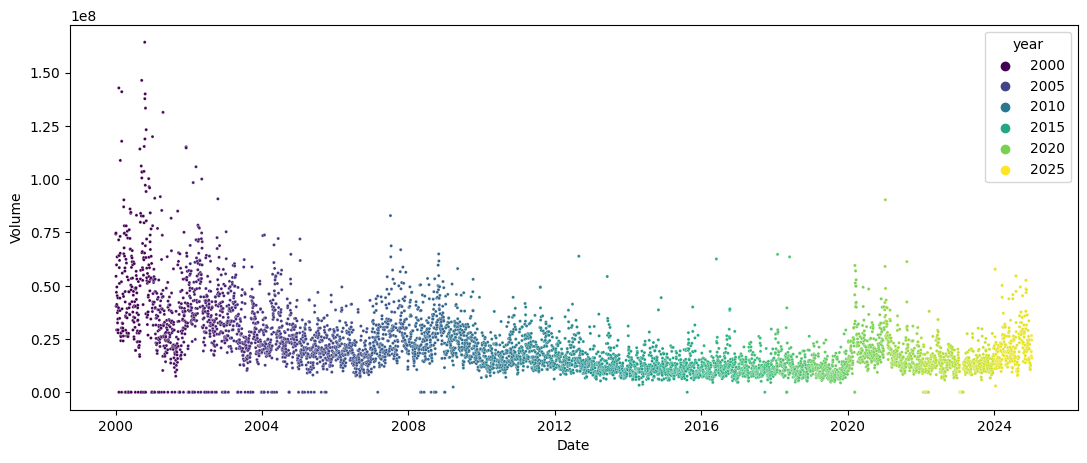

In [5]:
from seaborn import scatterplot
plt.figure(figsize=FIGSIZE)
scatterplot(palette=PALETTE, data=df, x='Date', y='Volume', hue='year', s=5)


What do we see?
* First of all it looks like we have some zero volumes, which probably indicate missing data, as a daily trading volume of zero doesn't make sense if prices are changing.
* Second, we see that by and large volumes stay in the same range; we have some outliers, but they aren't so large that the trend in volume disappears; we can easily see that volume has declined over time as the price has risen, although there are big volume days here and there early and late.

Let's see if we can plot the price and volume together.

<Axes: xlabel='Close', ylabel='Volume'>

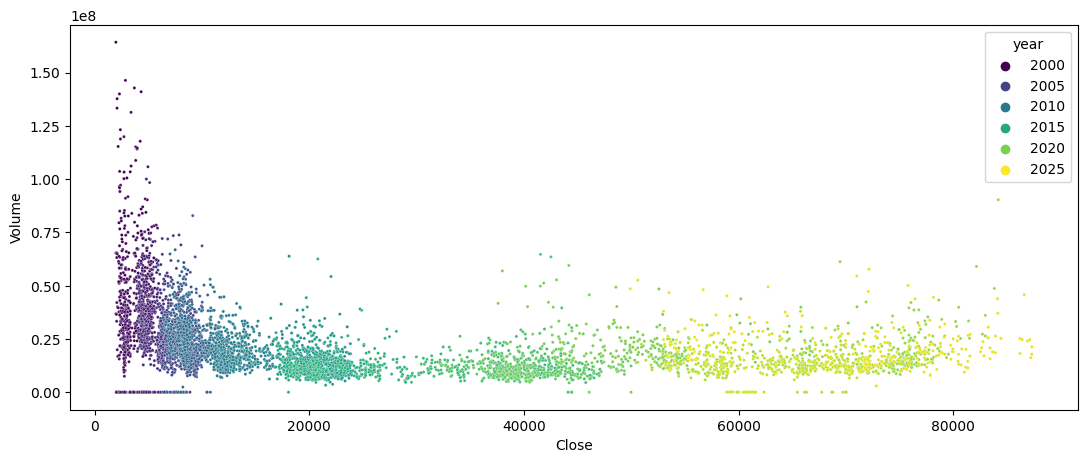

In [6]:
plt.figure(figsize=FIGSIZE)
scatterplot(palette=PALETTE, data=df, x='Close', y='Volume', hue='year', s=5)

In this plot the hue shows us that we have had price reversals, and that the relationship between price and volume is minimal; the negative correlation seems to be drive by the very high volume early in the time series, and is probably distorted by the zero volume data.

<Axes: xlabel='Close', ylabel='Volume'>

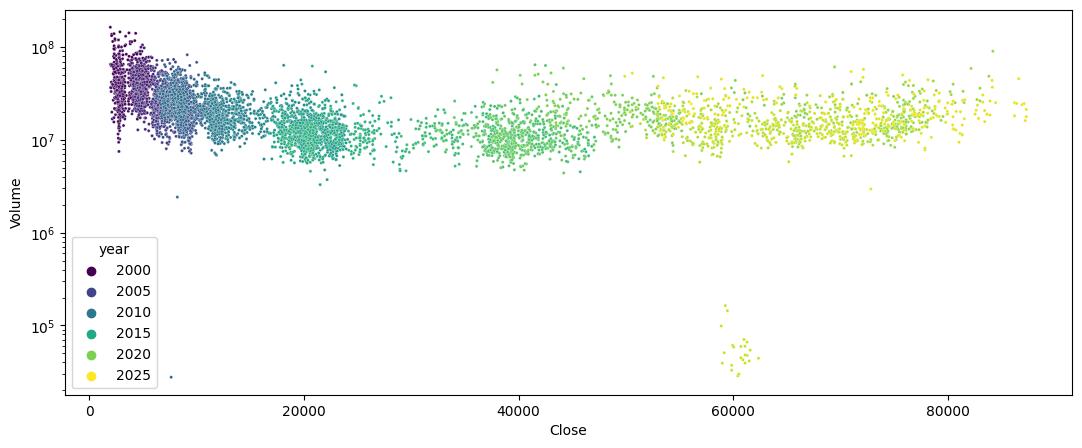

In [7]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette=PALETTE, data=df, x='Close', y='Volume', hue='year', s=5)

If instead we look at the log of the volume as a function of the price we see the log of the volume decline as a function of the price, on average, over time, and then settle into a regime where they are essentially uncorrelated. 

Let's try plotting the price time series and using the hue to represent the volume.

<Axes: xlabel='Date', ylabel='Close'>

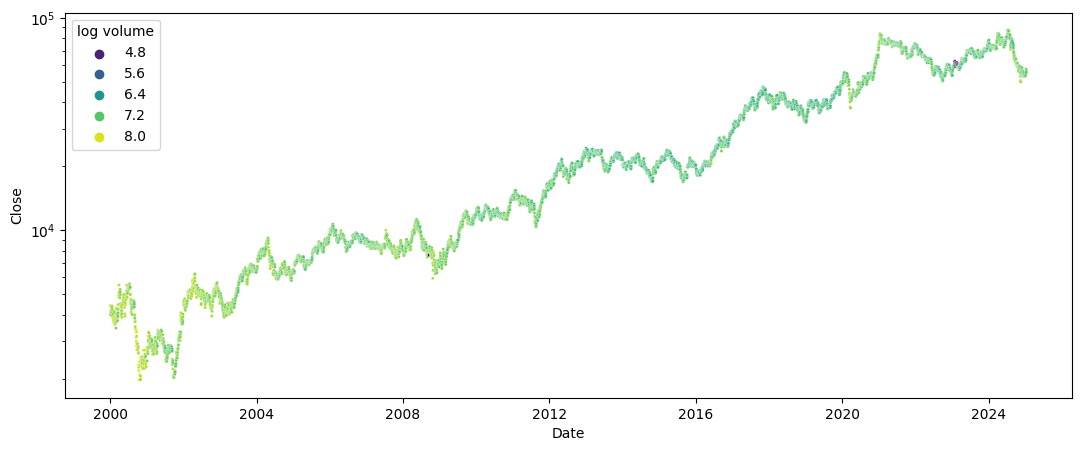

In [8]:
from math import log10

plt.figure(figsize=FIGSIZE)
df['log volume'] = df['Volume'].apply(func=lambda x: x if x <= 0 else log10(x))
plt.yscale(value='log')
scatterplot(palette=PALETTE, data=df[df['log volume'] > 0], x='Date', y='Close', hue='log volume', s=5)

This doesn't tell a very clear story because volume doesn't have a lot of clear trends, but we do see that volume was a lot higher early on, and there are occasional surges in volume near local minima.